In [1]:
import pandas as pd
df = pd.read_csv("teleCust.csv")
print(df)

     region  tenure  age  marital  address  income  ed  employ  retire  \
0         2      13   44        1        9    64.0   4       5     0.0   
1         3      11   33        1        7   136.0   5       5     0.0   
2         3      68   52        1       24   116.0   1      29     0.0   
3         2      33   33        0       12    33.0   2       0     0.0   
4         2      23   30        1        9    30.0   1       2     0.0   
..      ...     ...  ...      ...      ...     ...  ..     ...     ...   
995       3      10   39        0        0    27.0   3       0     0.0   
996       1       7   34        0        2    22.0   5       5     0.0   
997       3      67   59        0       40   944.0   5      33     0.0   
998       3      70   49        0       18    87.0   2      22     0.0   
999       3      50   36        1        7    39.0   3       3     0.0   

     gender  reside  custcat  
0         0       2        1  
1         0       6        4  
2         1       

<Axes: >

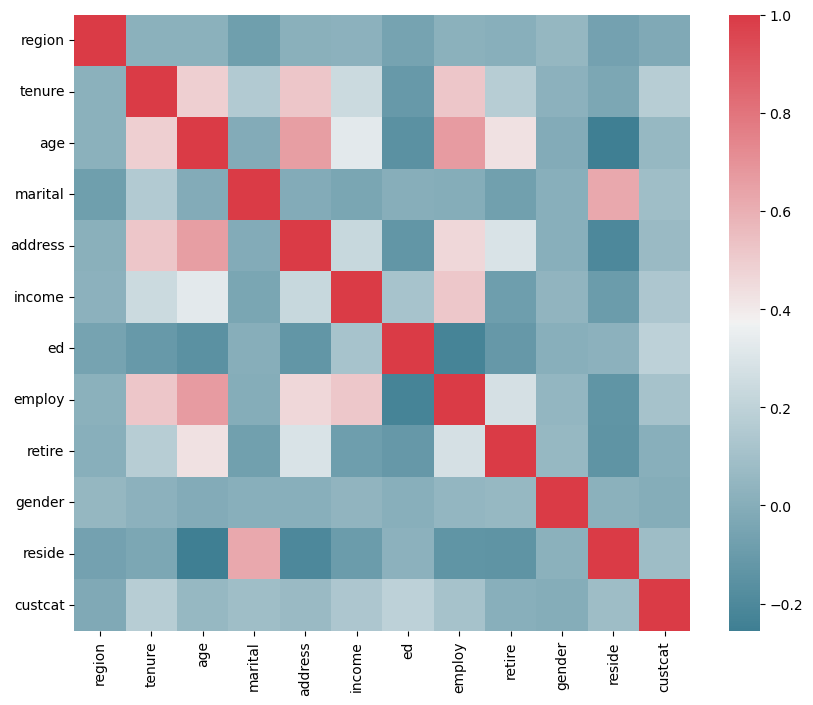

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

f, ax=plt.subplots(figsize=(10,8))
corr=df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr,dtype=np.bool_), cmap=sns.diverging_palette(220,10,as_cmap=True), square=True, ax=ax)

<Axes: >

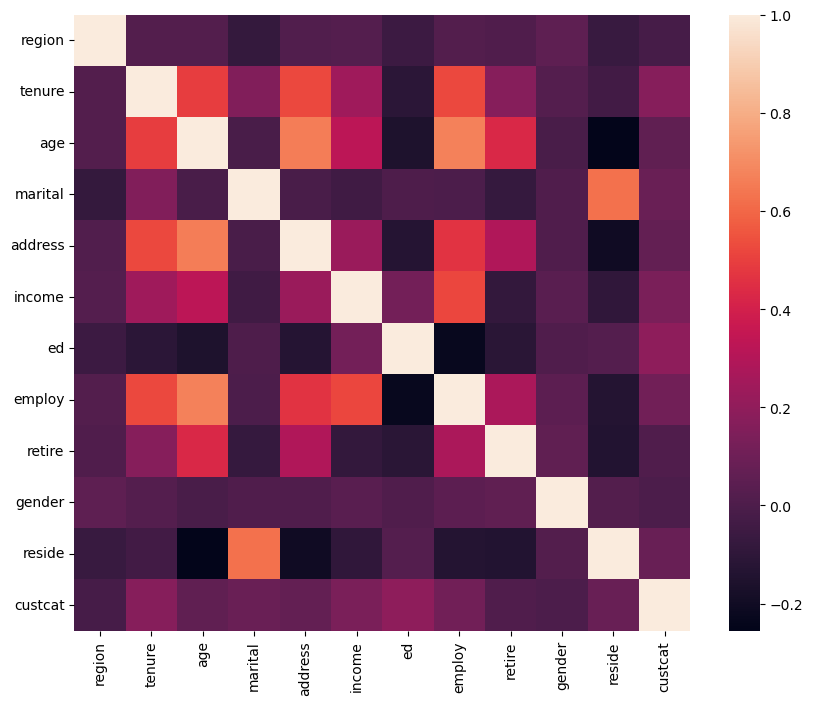

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

f, ax=plt.subplots(figsize=(10,8))
corr=df.corr()
sns.heatmap(corr, square=True, ax=ax)

In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print("X Values")
print(x)
print("Y Values")
print(y)

X Values
     region  tenure  age  marital  address  income  ed  employ  retire  \
0         2      13   44        1        9    64.0   4       5     0.0   
1         3      11   33        1        7   136.0   5       5     0.0   
2         3      68   52        1       24   116.0   1      29     0.0   
3         2      33   33        0       12    33.0   2       0     0.0   
4         2      23   30        1        9    30.0   1       2     0.0   
..      ...     ...  ...      ...      ...     ...  ..     ...     ...   
995       3      10   39        0        0    27.0   3       0     0.0   
996       1       7   34        0        2    22.0   5       5     0.0   
997       3      67   59        0       40   944.0   5      33     0.0   
998       3      70   49        0       18    87.0   2      22     0.0   
999       3      50   36        1        7    39.0   3       3     0.0   

     gender  reside  
0         0       2  
1         0       6  
2         1       2  
3         1   

In [9]:
from sklearn import neighbors, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Xtrain, Xtest, y_train, y_test = train_test_split(x, y, stratify=y, random_state=0, train_size=0.7)

scaler = preprocessing.StandardScaler().fit(Xtrain)
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

knn = neighbors.KNeighborsClassifier(n_neighbors=16)
knn.fit(Xtrain, y_train)
y_pred = knn.predict(Xtest)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.3566666666666667
              precision    recall  f1-score   support

           1       0.40      0.62      0.49        80
           2       0.33      0.28      0.30        65
           3       0.31      0.27      0.29        84
           4       0.35      0.23      0.27        71

    accuracy                           0.36       300
   macro avg       0.35      0.35      0.34       300
weighted avg       0.35      0.36      0.34       300

[[50  8 17  5]
 [17 18 18 12]
 [35 13 23 13]
 [24 15 16 16]]
